<a href="https://colab.research.google.com/github/MikolajKasprzyk/data_science_bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)

### <a name='a1'></a> Import Bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.22.4
Pandas: 1.5.3


### <a name='a2'></a> Załadowanie danych

In [23]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dana notowań ze stooq.pl wg symboli nazw w serwisie"""
    # pomocnicza biblioteka do pobierania danych
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq', start='16-05-2010')

df = fetch_financial_data()
df.info()

<ipython-input-23-31d1509f38ce>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return web.DataReader(name=company, data_source='stooq', start='16-05-2010')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3251 entries, 2023-04-14 to 2010-05-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3251 non-null   float64
 1   High    3251 non-null   float64
 2   Low     3251 non-null   float64
 3   Close   3251 non-null   float64
 4   Volume  3251 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 152.4 KB


In [ ]:
df.head(10) # zwraca zadane pierwsze wiersze (domyślnie 5)
df.tail(10) # zwraca zadane ostatnie wiersze (domyślnie 5)

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [31]:
# zmiana nazw kolumn na male litery
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2023-04-14,102.07,103.2013,101.110,102.51,51450522
2023-04-13,98.95,102.5700,98.710,102.40,67925138
2023-04-12,100.40,100.5100,97.705,97.83,56735007
2023-04-11,100.80,101.0000,99.010,99.92,60417847
2023-04-10,100.96,102.2000,99.570,102.17,37261185


In [13]:
df.describe()


,open,high,low,close,volume
count,3251.000000,3251.000000,3251.000000,3251.000000,3.251000e+03
mean,61.256824,61.968401,60.470636,61.233649,8.423586e+07
std,53.831880,54.484056,53.105169,53.785348,4.752345e+07
min,5.296500,5.564500,5.290000,5.430500,1.762674e+07
25%,14.565500,14.777750,14.371000,14.594250,5.473793e+07
50%,38.620000,39.000000,38.385500,38.594000,7.268900e+07
75%,95.091000,95.984500,93.892250,94.999250,9.920690e+07
max,187.200000,188.654000,184.840000,186.570000,8.479329e+08


### <a name='a3'></a> Selekcja Kolumn

In [32]:
df2 = df.iloc[:10]
df2

,open,high,low,close,volume
Date,,,,,
2023-04-14,102.07,103.2013,101.1100,102.51,51450522
2023-04-13,98.95,102.5700,98.7100,102.40,67925138
2023-04-12,100.40,100.5100,97.7050,97.83,56735007
2023-04-11,100.80,101.0000,99.0100,99.92,60417847
2023-04-10,100.96,102.2000,99.5700,102.17,37261185
2023-04-06,100.75,102.3817,99.8008,102.06,43808020
2023-04-05,103.91,103.9100,100.7506,101.10,45175393
2023-04-04,102.75,104.2000,102.1100,103.95,48662496
2023-04-03,102.30,103.2900,101.4300,102.41,41135733


In [36]:
df2[['open', 'close']]

,open,close
Date,,
2023-04-14,102.07,102.51
2023-04-13,98.95,102.40
2023-04-12,100.40,97.83
2023-04-11,100.80,99.92
2023-04-10,100.96,102.17
2023-04-06,100.75,102.06
2023-04-05,103.91,101.10
2023-04-04,102.75,103.95
2023-04-03,102.30,102.41


In [39]:
df2.iloc[:, [0, 3]]

,open,close
Date,,
2023-04-14,102.07,102.51
2023-04-13,98.95,102.40
2023-04-12,100.40,97.83
2023-04-11,100.80,99.92
2023-04-10,100.96,102.17
2023-04-06,100.75,102.06
2023-04-05,103.91,101.10
2023-04-04,102.75,103.95
2023-04-03,102.30,102.41


In [46]:
df.iloc[5:10,[0, 3]]

,open,close
Date,,
2023-04-06,100.75,102.06
2023-04-05,103.91,101.10
2023-04-04,102.75,103.95
2023-04-03,102.30,102.41
2023-03-31,102.16,103.29


In [50]:
df.iloc[:, [-1]]

,volume
Date,
2023-04-14,51450522
2023-04-13,67925138
2023-04-12,56735007
2023-04-11,60417847
2023-04-10,37261185
...,...
2010-05-21,159330920
2010-05-20,171412740
2010-05-19,129200060


### <a name='a4'></a> Selekcja Wierszy

In [52]:
df2.iloc[[0]] # data frame

,open,high,low,close,volume
Date,,,,,
2023-04-14,102.07,103.2013,101.11,102.51,51450522


In [53]:
df2.iloc[0] # series

open      1.020700e+02
high      1.032013e+02
low       1.011100e+02
close     1.025100e+02
volume    5.145052e+07
Name: 2023-04-14 00:00:00, dtype: float64

In [54]:
df2.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2023-04-14,102.07,103.2013,101.110,102.51,51450522
2023-04-13,98.95,102.5700,98.710,102.40,67925138
2023-04-12,100.40,100.5100,97.705,97.83,56735007


In [57]:
df2.loc[['2023-04-12']]
# wycina zadany wiersz, nawiasy kwadratowe i date frame/series analogicznie  

,open,high,low,close,volume
Date,,,,,
2023-04-12,100.4,100.51,97.705,97.83,56735007


In [62]:
df2.loc['2023-04-05':'2023-04-12'] # zadany przedział dat

,open,high,low,close,volume
Date,,,,,
2023-04-12,100.40,100.5100,97.7050,97.83,56735007
2023-04-11,100.80,101.0000,99.0100,99.92,60417847
2023-04-10,100.96,102.2000,99.5700,102.17,37261185
2023-04-06,100.75,102.3817,99.8008,102.06,43808020
2023-04-05,103.91,103.9100,100.7506,101.10,45175393


### <a name='a6'></a> Obliczanie nowych kolumn

In [65]:
df = fetch_financial_data('MSFT')
df.info()

<ipython-input-23-31d1509f38ce>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return web.DataReader(name=company, data_source='stooq', start='16-05-2010')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3251 entries, 2023-04-14 to 2010-05-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3251 non-null   float64
 1   High    3251 non-null   float64
 2   Low     3251 non-null   float64
 3   Close   3251 non-null   float64
 4   Volume  3251 non-null   float64
dtypes: float64(5)
memory usage: 152.4 KB


In [66]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-14,287.000,288.48,283.69,286.14,20987917.0
2023-04-13,283.590,289.90,283.17,289.84,24222678.0
2023-04-12,284.790,287.01,281.96,283.49,27403432.0
2023-04-11,285.750,285.98,281.64,282.83,27276589.0
2023-04-10,289.208,289.60,284.71,289.39,23102994.0


In [67]:
df.describe()

,Open,High,Low,Close,Volume
count,3251.000000,3251.000000,3251.000000,3251.000000,3.251000e+03
mean,100.940132,101.958229,99.884555,100.975974,4.205366e+07
std,91.796990,92.803825,90.740807,91.823926,2.627622e+07
min,18.142800,18.323500,17.858900,18.080200,7.885190e+06
25%,28.292900,28.666100,28.081850,28.420900,2.485604e+07
50%,54.290300,54.782800,53.543800,54.175200,3.391418e+07
75%,153.020000,154.464500,152.002000,153.248000,5.238587e+07
max,341.422000,346.426000,339.019000,339.922000,4.062640e+08


In [69]:
# tworzenie nowej kolumny
df['Average'] = (df.Open + df.Close) / 2
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2023-04-14,287.000,288.48,283.69,286.14,20987917.0,286.570
2023-04-13,283.590,289.90,283.17,289.84,24222678.0,286.715
2023-04-12,284.790,287.01,281.96,283.49,27403432.0,284.140
2023-04-11,285.750,285.98,281.64,282.83,27276589.0,284.290
2023-04-10,289.208,289.60,284.71,289.39,23102994.0,289.299


In [72]:
# sortowanie po indeksach
df = df.sort_index()
df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2010-05-17,22.9379,22.9686,22.3551,22.7383,5.860861e+07,22.8381
2010-05-18,22.6777,22.7890,22.3144,22.4713,6.701261e+07,22.5745
2010-05-19,22.4126,22.5417,21.8389,22.1904,7.856002e+07,22.3015
2010-05-20,21.7008,21.8765,21.2462,21.3028,1.118773e+08,21.5018
2010-05-21,20.8779,21.3028,20.7747,21.0893,1.496512e+08,20.9836
...,...,...,...,...,...,...
2023-04-10,289.2080,289.6000,284.7100,289.3900,2.310299e+07,289.2990
2023-04-11,285.7500,285.9800,281.6400,282.8300,2.727659e+07,284.2900
2023-04-12,284.7900,287.0100,281.9600,283.4900,2.740343e+07,284.1400


In [82]:
df.Close.shift(1) # przesuwa kolumne jeden w dół
df['Daily_Change'] = df.Close / df.Close.shift(1) - 1
df

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2010-05-17,22.9379,22.9686,22.3551,22.7383,5.860861e+07,22.8381,NaN
2010-05-18,22.6777,22.7890,22.3144,22.4713,6.701261e+07,22.5745,-0.011742
2010-05-19,22.4126,22.5417,21.8389,22.1904,7.856002e+07,22.3015,-0.012500
2010-05-20,21.7008,21.8765,21.2462,21.3028,1.118773e+08,21.5018,-0.039999
2010-05-21,20.8779,21.3028,20.7747,21.0893,1.496512e+08,20.9836,-0.010022
...,...,...,...,...,...,...,...
2023-04-10,289.2080,289.6000,284.7100,289.3900,2.310299e+07,289.2990,-0.007579
2023-04-11,285.7500,285.9800,281.6400,282.8300,2.727659e+07,284.2900,-0.022668
2023-04-12,284.7900,287.0100,281.9600,283.4900,2.740343e+07,284.1400,0.002334


In [83]:
df.Daily_Change.min()

-0.14746644967127787

In [85]:
df.Daily_Change.max()

0.14222274678744773

<Axes: >

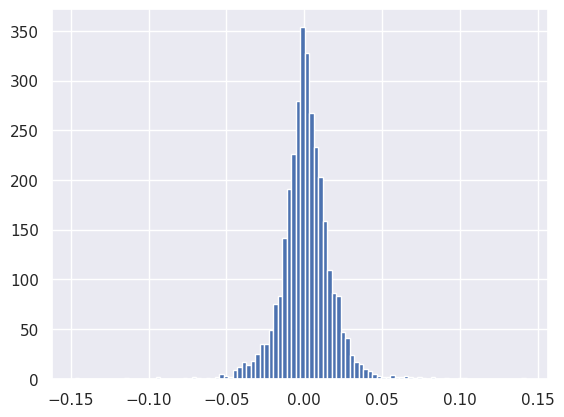

In [88]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

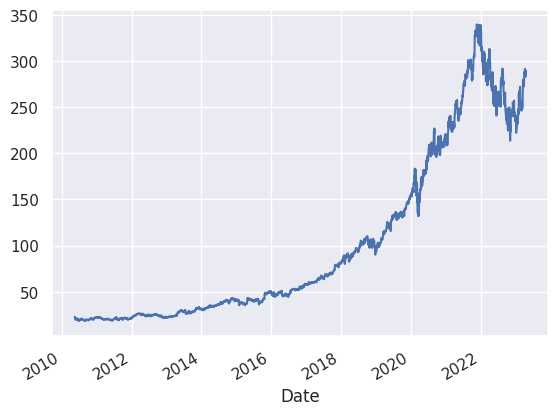

In [90]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [91]:
df.Daily_Change > 0 # maska logiczna

Date
2010-05-17    False
2010-05-18    False
2010-05-19    False
2010-05-20    False
2010-05-21    False
              ...  
2023-04-10    False
2023-04-11    False
2023-04-12     True
2023-04-13     True
2023-04-14    False
Name: Daily_Change, Length: 3251, dtype: bool

In [92]:
df[df.Daily_Change > 0] # wszystkie wiersze spelniajace warunek

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2010-05-27,20.2237,20.7150,20.2177,20.4311,1.734563e+08,20.32740,0.039708
2010-06-01,20.0906,20.6763,20.0559,20.3438,9.687786e+07,20.21720,0.003482
2010-06-02,20.4698,20.8094,20.2177,20.7934,8.306176e+07,20.63160,0.022100
2010-06-03,20.8540,21.1639,20.7507,21.1042,8.628358e+07,20.97910,0.014947
2010-06-10,19.7471,19.7629,19.4671,19.6428,9.945053e+07,19.69495,0.008513
...,...,...,...,...,...,...,...
2023-03-30,284.2300,284.4600,281.4800,284.0500,2.505341e+07,284.14000,0.012620
2023-03-31,283.7300,289.2700,283.0000,288.3000,3.276598e+07,286.01500,0.014962
2023-04-06,283.2100,292.0800,282.0300,291.6000,2.977033e+07,287.40500,0.025533


In [95]:
df_positive = df[df.Daily_Change > 0]
df_positive.Daily_Change.mean()

0.01190017100744077

In [96]:
df_negative = df[df.Daily_Change < 0]
df_negative.Daily_Change.mean()

-0.011153919876944392

In [99]:
df_high = df[df.Close == df.High]
df_high

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2010-07-20,19.5416,20.0211,19.4096,20.0211,5.789002e+07,19.78135,0.009815
2010-12-16,21.8299,21.9927,21.7336,21.9927,7.335307e+07,21.91130,0.004944
2011-01-25,22.1257,22.3551,22.0920,22.3551,5.396981e+07,22.24040,0.002583
2011-06-30,20.3358,20.5582,20.2971,20.5582,6.639350e+07,20.44700,0.014548
2011-09-07,20.4550,20.6962,20.3498,20.6962,5.265171e+07,20.57560,0.019261
2012-01-13,22.3998,22.6569,22.2876,22.6569,7.507183e+07,22.52835,0.009068
2012-07-03,24.5620,24.9919,24.5113,24.9919,2.577508e+07,24.77695,0.006439
2012-07-18,24.0497,24.7377,23.9346,24.7377,5.058217e+07,24.39370,0.026529
2012-10-04,24.5113,24.5610,24.1818,24.5610,5.335776e+07,24.53615,0.005650


In [102]:
df[df.index > '2019-11-01'] # wycinanie po indeksach

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-11-04,140.328,140.496,139.672,140.049,1.745510e+07,140.1885,0.005839
2019-11-05,140.466,140.516,139.424,139.960,1.883625e+07,140.2130,-0.000635
2019-11-06,139.871,140.019,138.739,139.573,1.710811e+07,139.7220,-0.002765
2019-11-07,139.354,140.376,139.285,139.771,1.835791e+07,139.5625,0.001419
2019-11-08,139.494,141.449,139.275,141.429,1.729094e+07,140.4615,0.011862
...,...,...,...,...,...,...,...
2023-04-10,289.208,289.600,284.710,289.390,2.310299e+07,289.2990,-0.007579
2023-04-11,285.750,285.980,281.640,282.830,2.727659e+07,284.2900,-0.022668
2023-04-12,284.790,287.010,281.960,283.490,2.740343e+07,284.1400,0.002334


In [104]:
df[(df.index >= '2019-11-01') & (df.index <= '2019-11-16')] 
# wycinanie po indeksach, warunek and

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-11-01,139.771,139.921,138.521,139.236,3.419223e+07,139.5035,0.002361
2019-11-04,140.328,140.496,139.672,140.049,1.745510e+07,140.1885,0.005839
2019-11-05,140.466,140.516,139.424,139.960,1.883625e+07,140.2130,-0.000635
2019-11-06,139.871,140.019,138.739,139.573,1.710811e+07,139.7220,-0.002765
2019-11-07,139.354,140.376,139.285,139.771,1.835791e+07,139.5625,0.001419
2019-11-08,139.494,141.449,139.275,141.429,1.729094e+07,140.4615,0.011862
2019-11-11,140.823,141.866,140.229,141.569,1.483166e+07,141.1960,0.000990
2019-11-12,141.727,142.988,141.519,142.491,1.924759e+07,142.1090,0.006513
2019-11-13,142.163,142.879,141.727,142.730,1.800443e+07,142.4465,0.001677


In [106]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-18')] 
# wycinanie po indeksach, warunek or

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-11-01,139.771,139.921,138.521,139.236,3.419223e+07,139.5035,0.002361
2019-11-18,145.400,145.868,144.338,145.668,2.224696e+07,145.5340,0.002519


In [107]:
df

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2010-05-17,22.9379,22.9686,22.3551,22.7383,5.860861e+07,22.8381,NaN
2010-05-18,22.6777,22.7890,22.3144,22.4713,6.701261e+07,22.5745,-0.011742
2010-05-19,22.4126,22.5417,21.8389,22.1904,7.856002e+07,22.3015,-0.012500
2010-05-20,21.7008,21.8765,21.2462,21.3028,1.118773e+08,21.5018,-0.039999
2010-05-21,20.8779,21.3028,20.7747,21.0893,1.496512e+08,20.9836,-0.010022
...,...,...,...,...,...,...,...
2023-04-10,289.2080,289.6000,284.7100,289.3900,2.310299e+07,289.2990,-0.007579
2023-04-11,285.7500,285.9800,281.6400,282.8300,2.727659e+07,284.2900,-0.022668
2023-04-12,284.7900,287.0100,281.9600,283.4900,2.740343e+07,284.1400,0.002334


In [109]:
# dane dla danego miesiąca
df.index.month # zwraca numer miesiaca w indeksie
df.index.year # zwraca rok w postaci int

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='Date', length=3251)

In [112]:
# wycinamy dane dla maja 2012
df_2012_05 = df[(df.index.month == 5) & (df.index.year == 2013)]
df_2012_05

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2013-05-01,27.3764,27.5026,27.1045,27.2027,6.535131e+07,27.28955,-0.011580
2013-05-02,27.1293,27.5781,26.9288,27.5711,5.540680e+07,27.35020,0.013543
2013-05-03,27.6246,27.8700,27.5026,27.8460,5.627441e+07,27.73530,0.009971
2013-05-06,27.7856,28.1925,27.6406,28.0565,4.929296e+07,27.92105,0.007559
2013-05-07,27.9781,28.0932,27.6336,27.6942,5.415433e+07,27.83615,-0.012913
2013-05-08,27.4956,27.6336,27.1462,27.4291,6.205818e+07,27.46235,-0.009572
2013-05-09,27.3100,27.4371,27.0965,27.1521,5.778183e+07,27.23105,-0.010099
2013-05-10,27.1611,27.2027,26.8702,27.1789,4.377563e+07,27.17000,0.000987
2013-05-13,27.1124,27.4956,27.0657,27.4648,4.334427e+07,27.28860,0.010519


array([False, False, False, ..., False, False, False])